In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

## Configura√ß√£o de Caminhos

Usamos `Path` da `pathlib` para construir caminhos de forma port√°vel entre sistemas operacionais.

In [26]:
# Cria objeto Path para a pasta de dados
pasta_dados = Path('data')

# Cria caminho para subpasta 'raw' dentro de 'data'
pasta_dados_brutos = pasta_dados / 'raw'

# Exibe os caminhos criados
print(f"Caminhos:\n  Dados: {pasta_dados}\n  - Raw:   {pasta_dados_brutos}")


Caminhos:
  Dados: data
  - Raw:   data\raw


In [27]:
caminho_titanic_bruto = pasta_dados_brutos / 'titanic.csv' # caminho do arquivo
raw_df = pd.read_csv(caminho_titanic_bruto)
raw_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Profiling Inicial do DataFrame

An√°lise explorat√≥ria r√°pida para entender estrutura, tipos e poss√≠veis problemas nos dados.

In [28]:
# Informa√ß√µes b√°sicas sobre o DataFrame
print("=== INFORMA√á√ïES B√ÅSICAS ===")
print(f"Dimens√µes: {raw_df.shape}")
print(f"Total de registros: {len(raw_df)}")
print(f"Total de colunas: {len(raw_df.columns)}")
print(f"Mem√≥ria usada: {raw_df.memory_usage(deep=True).sum() / 1024:.1f} KB")

=== INFORMA√á√ïES B√ÅSICAS ===
Dimens√µes: (891, 12)
Total de registros: 891
Total de colunas: 12
Mem√≥ria usada: 285.6 KB


In [29]:
# Tipos de dados por coluna
print("\n=== TIPOS DE DADOS ===")
print(raw_df.dtypes)


=== TIPOS DE DADOS ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [30]:
# Valores ausentes por coluna
print("\n=== VALORES AUSENTES ===")
valores_ausentes = raw_df.isnull().sum()
percentual_ausentes = (valores_ausentes / len(raw_df)) * 100

ausentes_df = pd.DataFrame({
    'Ausentes': valores_ausentes,
    'Percentual': percentual_ausentes.round(1)
})
print(ausentes_df[ausentes_df['Ausentes'] > 0])


=== VALORES AUSENTES ===
          Ausentes  Percentual
Age            177        19.9
Cabin          687        77.1
Embarked         2         0.2


In [31]:
# Estat√≠sticas descritivas para colunas num√©ricas
print("\n=== ESTAT√çSTICAS NUM√âRICAS ===")
raw_df.describe()


=== ESTAT√çSTICAS NUM√âRICAS ===


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [32]:
# Valores √∫nicos para colunas categ√≥ricas
print("\n=== VALORES √öNICOS (CATEG√ìRICAS) ===")
colunas_categoricas = raw_df.select_dtypes(include=['object']).columns

for coluna in colunas_categoricas:
    valores_unicos = raw_df[coluna].nunique()
    print(f"{coluna}: {valores_unicos} valores √∫nicos")
    if valores_unicos <= 10:  # Mostra valores se poucos
        print(f"  ‚Üí {list(raw_df[coluna].unique())}")
    print()


=== VALORES √öNICOS (CATEG√ìRICAS) ===
Name: 891 valores √∫nicos

Sex: 2 valores √∫nicos
  ‚Üí ['male', 'female']

Ticket: 681 valores √∫nicos

Cabin: 147 valores √∫nicos

Embarked: 3 valores √∫nicos
  ‚Üí ['S', 'C', 'Q', nan]



In [33]:
# Verifica√ß√£o de registros duplicados
print("=== DUPLICATAS ===")
duplicatas = raw_df.duplicated().sum()
print(f"Registros duplicados: {duplicatas}")

if duplicatas > 0:
    print("Primeiras 5 duplicatas:")
    print(raw_df[raw_df.duplicated()].head())

=== DUPLICATAS ===
Registros duplicados: 0


## Visualiza√ß√µes Explorat√≥rias

Gr√°ficos simples para entender distribui√ß√µes e padr√µes nos dados usando seaborn.

In [34]:
import seaborn as sns

# Configura√ß√£o do estilo seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

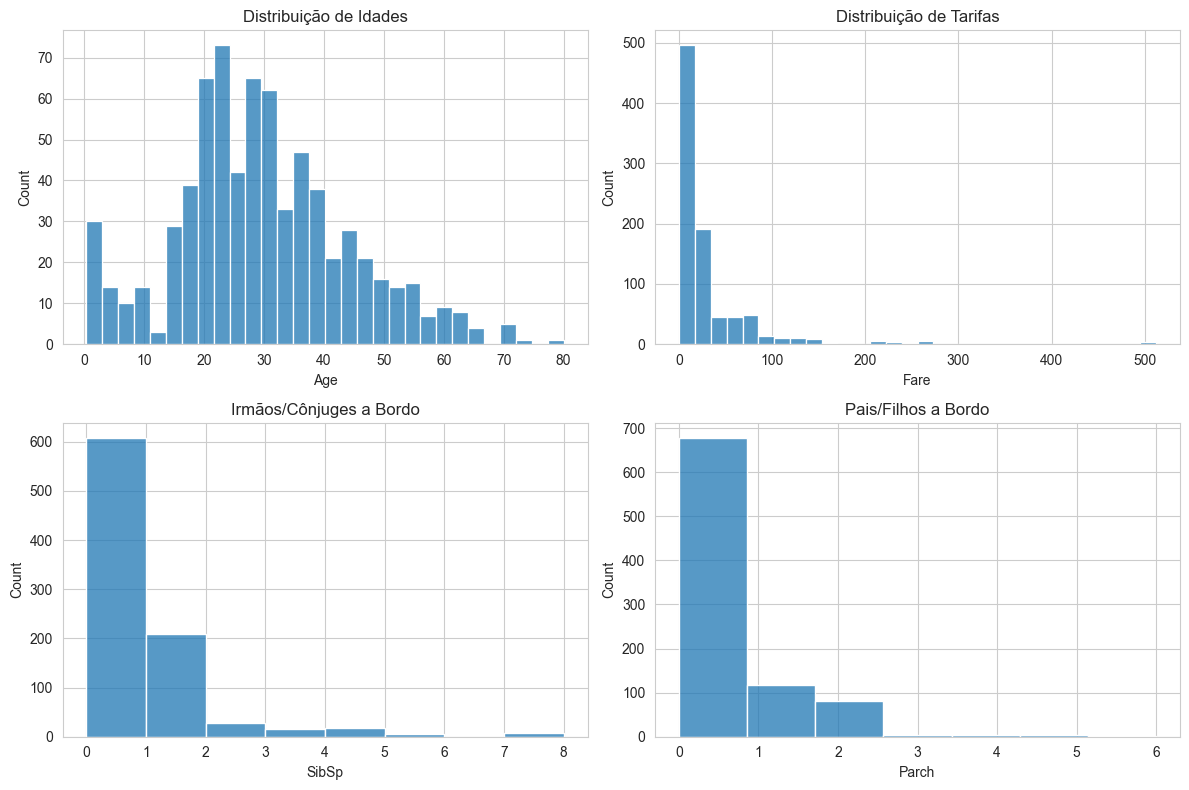

In [35]:
# Histogramas das vari√°veis num√©ricas com seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Age - distribui√ß√£o de idades
sns.histplot(data=raw_df, x='Age', bins=30, ax=axes[0,0])
axes[0,0].set_title('Distribui√ß√£o de Idades')

# Fare - distribui√ß√£o de tarifas
sns.histplot(data=raw_df, x='Fare', bins=30, ax=axes[0,1])
axes[0,1].set_title('Distribui√ß√£o de Tarifas')

# SibSp - irm√£os/c√¥njuges a bordo
sns.histplot(data=raw_df, x='SibSp', bins=8, ax=axes[1,0])
axes[1,0].set_title('Irm√£os/C√¥njuges a Bordo')

# Parch - pais/filhos a bordo
sns.histplot(data=raw_df, x='Parch', bins=7, ax=axes[1,1])
axes[1,1].set_title('Pais/Filhos a Bordo')

plt.tight_layout()
plt.show()

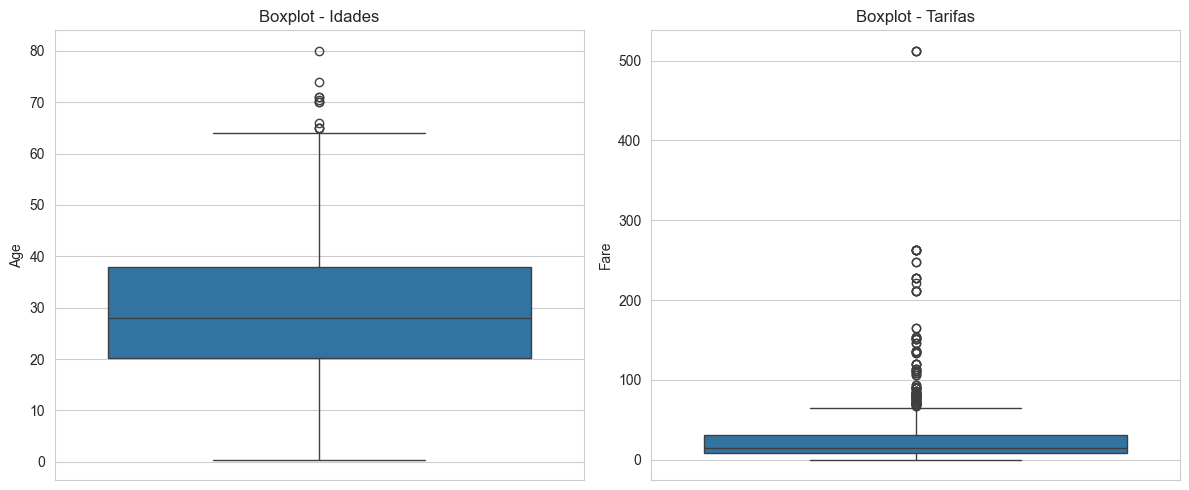

In [36]:
# Boxplots para detectar outliers com seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age - boxplot para outliers de idade
sns.boxplot(data=raw_df, y='Age', ax=axes[0])
axes[0].set_title('Boxplot - Idades')

# Fare - boxplot para outliers de tarifa
sns.boxplot(data=raw_df, y='Fare', ax=axes[1])
axes[1].set_title('Boxplot - Tarifas')

plt.tight_layout()
plt.show()

C:\Users\brunoritter\AppData\Local\Temp\ipykernel_24264\610270265.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['N√£o', 'Sim'])


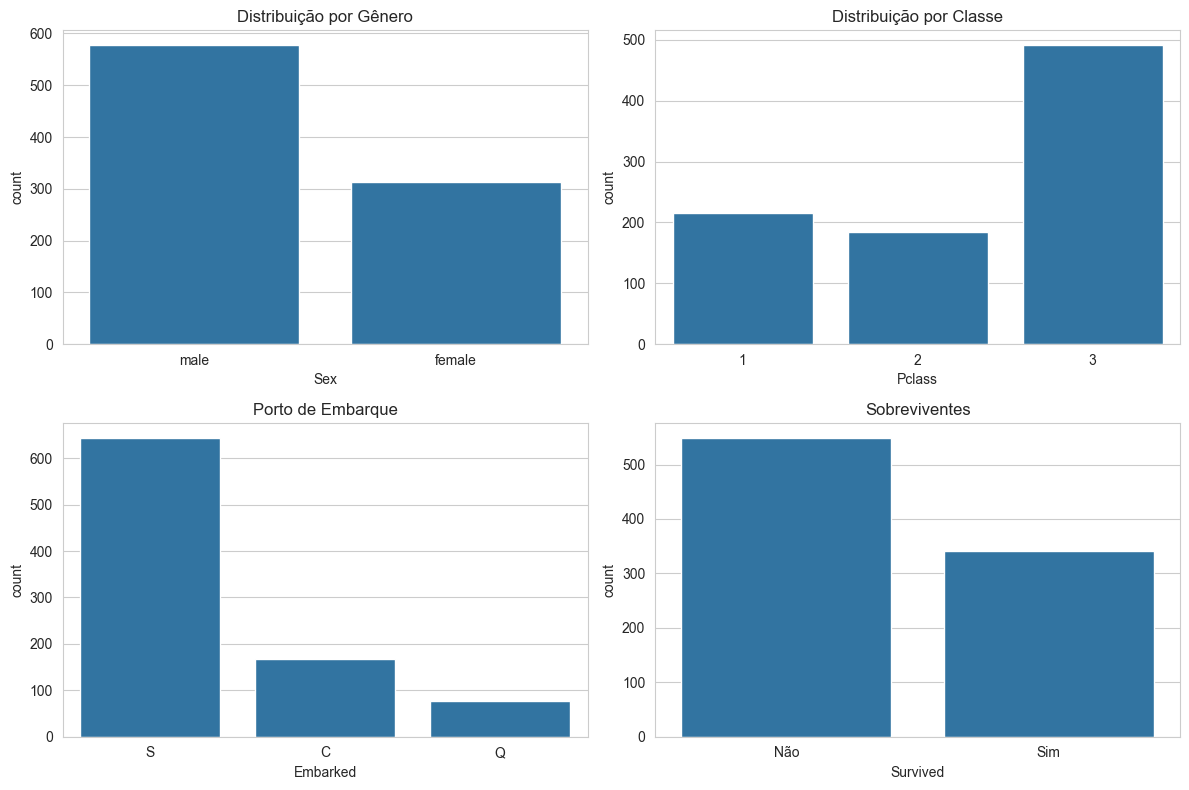

In [37]:
# Gr√°ficos de contagem para vari√°veis categ√≥ricas com seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Sex - distribui√ß√£o por g√™nero
sns.countplot(data=raw_df, x='Sex', ax=axes[0,0])
axes[0,0].set_title('Distribui√ß√£o por G√™nero')

# Pclass - distribui√ß√£o por classe  
sns.countplot(data=raw_df, x='Pclass', ax=axes[0,1])
axes[0,1].set_title('Distribui√ß√£o por Classe')

# Embarked - distribui√ß√£o por porto de embarque
sns.countplot(data=raw_df, x='Embarked', ax=axes[1,0])
axes[1,0].set_title('Porto de Embarque')

# Survived - distribui√ß√£o de sobreviventes
sns.countplot(data=raw_df, x='Survived', ax=axes[1,1])
axes[1,1].set_title('Sobreviventes')
axes[1,1].set_xticklabels(['N√£o', 'Sim'])

plt.tight_layout()
plt.show()

## 1. Prepara√ß√£o dos Dados para Modelagem

Separamos registros com idade conhecida (treino/teste) dos registros com idade ausente (predi√ß√£o futura).

In [38]:
# Separar registros com e sem idade conhecida
dados_com_idade = raw_df[raw_df['Age'].notna()].copy()
dados_sem_idade = raw_df[raw_df['Age'].isna()].copy()

print(f"Registros com idade: {len(dados_com_idade)}")
print(f"Registros sem idade: {len(dados_sem_idade)}")
print(f"Percentual sem idade: {len(dados_sem_idade) / len(raw_df) * 100:.1f}%")

Registros com idade: 714
Registros sem idade: 177
Percentual sem idade: 19.9%


In [39]:
# Imports necess√°rios para modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Preparar dados b√°sicos
dados_modelo = dados_com_idade.copy()
dados_modelo['Embarked'] = dados_modelo['Embarked'].fillna('S')
dados_modelo['Fare'] = dados_modelo['Fare'].fillna(dados_modelo['Fare'].median())

# Codifica√ß√£o simples com LabelEncoder (baseline)
le_sex = LabelEncoder()
le_embarked = LabelEncoder()
dados_modelo['Sex_encoded'] = le_sex.fit_transform(dados_modelo['Sex'])
dados_modelo['Embarked_encoded'] = le_embarked.fit_transform(dados_modelo['Embarked'])

# Features e target
features_baseline = ['Pclass', 'Sex_encoded', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']
X_baseline = dados_modelo[features_baseline]
y = dados_modelo['Age']

# Split treino/teste (fixo para compara√ß√µes)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_baseline, y, test_size=0.2, random_state=42
)

print(f"Conjunto treino: {X_treino.shape}")
print(f"Conjunto teste: {X_teste.shape}")
print(f"Features baseline: {features_baseline}")

Conjunto treino: (571, 6)
Conjunto teste: (143, 6)
Features baseline: ['Pclass', 'Sex_encoded', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']


## 2. M√©tricas de Erro - Nossa B√∫ssola para Melhorias

As m√©tricas de erro nos guiam para identificar onde e como melhorar nossos modelos. Come√ßamos com modelos simples para estabelecer valores de refer√™ncia.

In [40]:
# Tabela para acompanhar todos os experimentos
resultados_experimentos = []

def adicionar_resultado(nome, modelo, X_treino, X_teste, y_treino, y_teste):
    """Fun√ß√£o para padronizar avalia√ß√£o e registro de resultados"""
    modelo.fit(X_treino, y_treino)
    pred = modelo.predict(X_teste)
    
    mae = mean_absolute_error(y_teste, pred)
    rmse = np.sqrt(mean_squared_error(y_teste, pred))
    
    resultados_experimentos.append({
        'Experimento': nome,
        'Features': X_treino.shape[1],
        'MAE': mae,
        'RMSE': rmse
    })
    
    print(f"{nome}: MAE={mae:.2f}, RMSE={rmse:.2f}")
    return mae, rmse

# Experimento 1: Regress√£o Linear Baseline
print("=== EXPERIMENTO 1: MODELOS BASELINE ===")
lr_baseline = LinearRegression()
adicionar_resultado("1.1 - Linear Regression (LabelEncoder)", 
                   lr_baseline, X_treino, X_teste, y_treino, y_teste)

# Experimento 2: KNN Baseline  
knn_baseline = KNeighborsRegressor(n_neighbors=5)
adicionar_resultado("1.2 - KNN k=5 (LabelEncoder)", 
                   knn_baseline, X_treino, X_teste, y_treino, y_teste)

=== EXPERIMENTO 1: MODELOS BASELINE ===
1.1 - Linear Regression (LabelEncoder): MAE=9.57, RMSE=11.81
1.2 - KNN k=5 (LabelEncoder): MAE=10.10, RMSE=12.59


(10.103370629370627, np.float64(12.591060379591445))

## 3. Melhoria 1: One-Hot Encoding vs Label Encoding

Testamos diferentes formas de codificar vari√°veis categ√≥ricas. One-Hot evita assumir ordem nas categorias, mas pode criar "dummy trap" se n√£o usarmos drop='first'.

In [41]:
# Preparar One-Hot Encoding SEM drop (dummy trap poss√≠vel)
ohe_sem_drop = OneHotEncoder(sparse_output=False, drop=None)
sex_ohe = ohe_sem_drop.fit_transform(dados_modelo[['Sex']])
embarked_ohe = ohe_sem_drop.fit_transform(dados_modelo[['Embarked']])

# One-Hot Encoding COM drop (evita dummy trap)
ohe_com_drop = OneHotEncoder(sparse_output=False, drop='first')
sex_ohe_drop = ohe_com_drop.fit_transform(dados_modelo[['Sex']])
embarked_ohe_drop = ohe_com_drop.fit_transform(dados_modelo[['Embarked']])

print("=== EXPERIMENTO 2: ONE-HOT ENCODING ===")
print(f"One-Hot sem drop: Sex={sex_ohe.shape[1]} cols, Embarked={embarked_ohe.shape[1]} cols")
print(f"One-Hot com drop: Sex={sex_ohe_drop.shape[1]} cols, Embarked={embarked_ohe_drop.shape[1]} cols")

# Criar datasets One-Hot
features_numericas = dados_modelo[['Pclass', 'SibSp', 'Parch', 'Fare']].values

# Dataset SEM drop
X_ohe_sem = np.concatenate([features_numericas, sex_ohe, embarked_ohe], axis=1)
X_ohe_sem_treino, X_ohe_sem_teste, _, _ = train_test_split(
    X_ohe_sem, y, test_size=0.2, random_state=42
)

# Dataset COM drop  
X_ohe_com = np.concatenate([features_numericas, sex_ohe_drop, embarked_ohe_drop], axis=1)
X_ohe_com_treino, X_ohe_com_teste, _, _ = train_test_split(
    X_ohe_com, y, test_size=0.2, random_state=42
)

print(f"Features sem drop: {X_ohe_sem.shape[1]}")
print(f"Features com drop: {X_ohe_com.shape[1]}")

=== EXPERIMENTO 2: ONE-HOT ENCODING ===
One-Hot sem drop: Sex=2 cols, Embarked=3 cols
One-Hot com drop: Sex=1 cols, Embarked=2 cols
Features sem drop: 9
Features com drop: 7


In [42]:
# Testar Regress√£o Linear com One-Hot (problema dummy trap!)
lr_ohe_sem = LinearRegression()
adicionar_resultado("2.1 - Linear Regression (One-Hot sem drop)", 
                   lr_ohe_sem, X_ohe_sem_treino, X_ohe_sem_teste, y_treino, y_teste)

lr_ohe_com = LinearRegression()
adicionar_resultado("2.2 - Linear Regression (One-Hot com drop)", 
                   lr_ohe_com, X_ohe_com_treino, X_ohe_com_teste, y_treino, y_teste)

# Testar KNN com One-Hot (menos sens√≠vel a dummy trap)
knn_ohe_sem = KNeighborsRegressor(n_neighbors=5)
adicionar_resultado("2.3 - KNN k=5 (One-Hot sem drop)", 
                   knn_ohe_sem, X_ohe_sem_treino, X_ohe_sem_teste, y_treino, y_teste)

knn_ohe_com = KNeighborsRegressor(n_neighbors=5)
adicionar_resultado("2.4 - KNN k=5 (One-Hot com drop)", 
                   knn_ohe_com, X_ohe_com_treino, X_ohe_com_teste, y_treino, y_teste)

2.1 - Linear Regression (One-Hot sem drop): MAE=9.53, RMSE=11.76
2.2 - Linear Regression (One-Hot com drop): MAE=9.53, RMSE=11.76
2.3 - KNN k=5 (One-Hot sem drop): MAE=10.01, RMSE=12.54
2.4 - KNN k=5 (One-Hot com drop): MAE=9.80, RMSE=12.19


(9.800111888111886, np.float64(12.194948675693439))

## 4. Melhoria 2: Escalonamento de Features

KNN √© sens√≠vel a diferen√ßas de escala. Comparamos MinMaxScaler (0-1), StandardScaler (z-score) e RobustScaler (menos sens√≠vel a outliers).

In [43]:
# Usar melhor configura√ß√£o anterior (One-Hot com drop)
X_base_treino, X_base_teste = X_ohe_com_treino, X_ohe_com_teste

print("=== EXPERIMENTO 3: ESCALONAMENTO ===")

# MinMaxScaler (0-1)
scaler_minmax = MinMaxScaler()
X_minmax_treino = scaler_minmax.fit_transform(X_base_treino)
X_minmax_teste = scaler_minmax.transform(X_base_teste)

# StandardScaler (z-score: m√©dia=0, std=1)
scaler_standard = StandardScaler()
X_standard_treino = scaler_standard.fit_transform(X_base_treino)
X_standard_teste = scaler_standard.transform(X_base_teste)

# RobustScaler (mediana e quartis, menos sens√≠vel a outliers)
scaler_robust = RobustScaler()
X_robust_treino = scaler_robust.fit_transform(X_base_treino)
X_robust_teste = scaler_robust.transform(X_base_teste)

print("Escaladores preparados: MinMax, Standard, Robust")

=== EXPERIMENTO 3: ESCALONAMENTO ===
Escaladores preparados: MinMax, Standard, Robust


In [44]:
# Regress√£o Linear (n√£o afetada por escalonamento)
lr_minmax = LinearRegression()
adicionar_resultado("3.1 - Linear Regression + MinMaxScaler", 
                   lr_minmax, X_minmax_treino, X_minmax_teste, y_treino, y_teste)

# KNN com diferentes escalonamentos
knn_minmax = KNeighborsRegressor(n_neighbors=5)
adicionar_resultado("3.2 - KNN k=5 + MinMaxScaler", 
                   knn_minmax, X_minmax_treino, X_minmax_teste, y_treino, y_teste)

knn_standard = KNeighborsRegressor(n_neighbors=5)
adicionar_resultado("3.3 - KNN k=5 + StandardScaler", 
                   knn_standard, X_standard_treino, X_standard_teste, y_treino, y_teste)

knn_robust = KNeighborsRegressor(n_neighbors=5)
adicionar_resultado("3.4 - KNN k=5 + RobustScaler", 
                   knn_robust, X_robust_treino, X_robust_teste, y_treino, y_teste)

3.1 - Linear Regression + MinMaxScaler: MAE=9.53, RMSE=11.76
3.2 - KNN k=5 + MinMaxScaler: MAE=9.66, RMSE=12.26
3.3 - KNN k=5 + StandardScaler: MAE=9.21, RMSE=11.79
3.4 - KNN k=5 + RobustScaler: MAE=9.48, RMSE=11.93


(9.48158041958042, np.float64(11.926270370532816))

## 5. Melhoria 3: Hiperpar√¢metros do KNN

Testamos diferentes valores de k (vizinhos) e m√©tricas de dist√¢ncia (euclidiana vs manhattan) para otimizar o KNN.

In [45]:
# Usar melhor escalonamento anterior (identificar qual teve menor RMSE)
print("=== EXPERIMENTO 4: HIPERPAR√ÇMETROS KNN ===")

# Testar diferentes valores de k
for k in [3, 5, 7, 10, 15]:
    knn_k = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    adicionar_resultado(f"4.1 - KNN k={k} (Euclidiana)", 
                       knn_k, X_standard_treino, X_standard_teste, y_treino, y_teste)

# Testar diferentes m√©tricas de dist√¢ncia com k=5
print("\n--- Testando m√©tricas de dist√¢ncia ---")
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
adicionar_resultado("4.2 - KNN k=5 (Euclidiana)", 
                   knn_euclidean, X_standard_treino, X_standard_teste, y_treino, y_teste)

knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
adicionar_resultado("4.3 - KNN k=5 (Manhattan)", 
                   knn_manhattan, X_standard_treino, X_standard_teste, y_treino, y_teste)

=== EXPERIMENTO 4: HIPERPAR√ÇMETROS KNN ===
4.1 - KNN k=3 (Euclidiana): MAE=9.44, RMSE=12.41
4.1 - KNN k=5 (Euclidiana): MAE=9.21, RMSE=11.79
4.1 - KNN k=7 (Euclidiana): MAE=9.09, RMSE=11.63
4.1 - KNN k=10 (Euclidiana): MAE=9.34, RMSE=11.72
4.1 - KNN k=15 (Euclidiana): MAE=9.28, RMSE=11.71

--- Testando m√©tricas de dist√¢ncia ---
4.2 - KNN k=5 (Euclidiana): MAE=9.21, RMSE=11.79
4.3 - KNN k=5 (Manhattan): MAE=9.47, RMSE=11.92


(9.467594405594406, np.float64(11.921153458295207))

## 6. An√°lise Final dos Resultados

Comparamos todos os experimentos para identificar as melhores pr√°ticas e entender o impacto de cada escolha nas m√©tricas de erro.

In [46]:
# Tabela final com todos os resultados
df_resultados = pd.DataFrame(resultados_experimentos)
df_resultados_sorted = df_resultados.sort_values('RMSE')

print("=== RANKING DOS MODELOS (ordenado por RMSE) ===")
print(df_resultados_sorted.round(3))

# Identificar melhor modelo
melhor_modelo = df_resultados_sorted.iloc[0]
print(f"\nüèÜ MELHOR MODELO:")
print(f"   {melhor_modelo['Experimento']}")
print(f"   RMSE: {melhor_modelo['RMSE']:.3f}")
print(f"   MAE: {melhor_modelo['MAE']:.3f}")

# Comparar baseline vs melhor
baseline = df_resultados[df_resultados['Experimento'].str.contains('1.1')].iloc[0]
melhoria_rmse = ((baseline['RMSE'] - melhor_modelo['RMSE']) / baseline['RMSE']) * 100

print(f"\nüìà MELHORIA vs BASELINE:")
print(f"   Redu√ß√£o RMSE: {melhoria_rmse:.1f}%")
print(f"   Baseline: {baseline['RMSE']:.3f} ‚Üí Melhor: {melhor_modelo['RMSE']:.3f}")

=== RANKING DOS MODELOS (ordenado por RMSE) ===
                                   Experimento  Features     MAE    RMSE
12                  4.1 - KNN k=7 (Euclidiana)         7   9.089  11.632
14                 4.1 - KNN k=15 (Euclidiana)         7   9.282  11.714
13                 4.1 - KNN k=10 (Euclidiana)         7   9.337  11.721
3   2.2 - Linear Regression (One-Hot com drop)         7   9.530  11.762
6       3.1 - Linear Regression + MinMaxScaler         7   9.530  11.762
2   2.1 - Linear Regression (One-Hot sem drop)         9   9.530  11.762
8               3.3 - KNN k=5 + StandardScaler         7   9.211  11.789
11                  4.1 - KNN k=5 (Euclidiana)         7   9.211  11.789
15                  4.2 - KNN k=5 (Euclidiana)         7   9.211  11.789
0       1.1 - Linear Regression (LabelEncoder)         6   9.574  11.811
16                   4.3 - KNN k=5 (Manhattan)         7   9.468  11.921
9                 3.4 - KNN k=5 + RobustScaler         7   9.482  11.926
5  

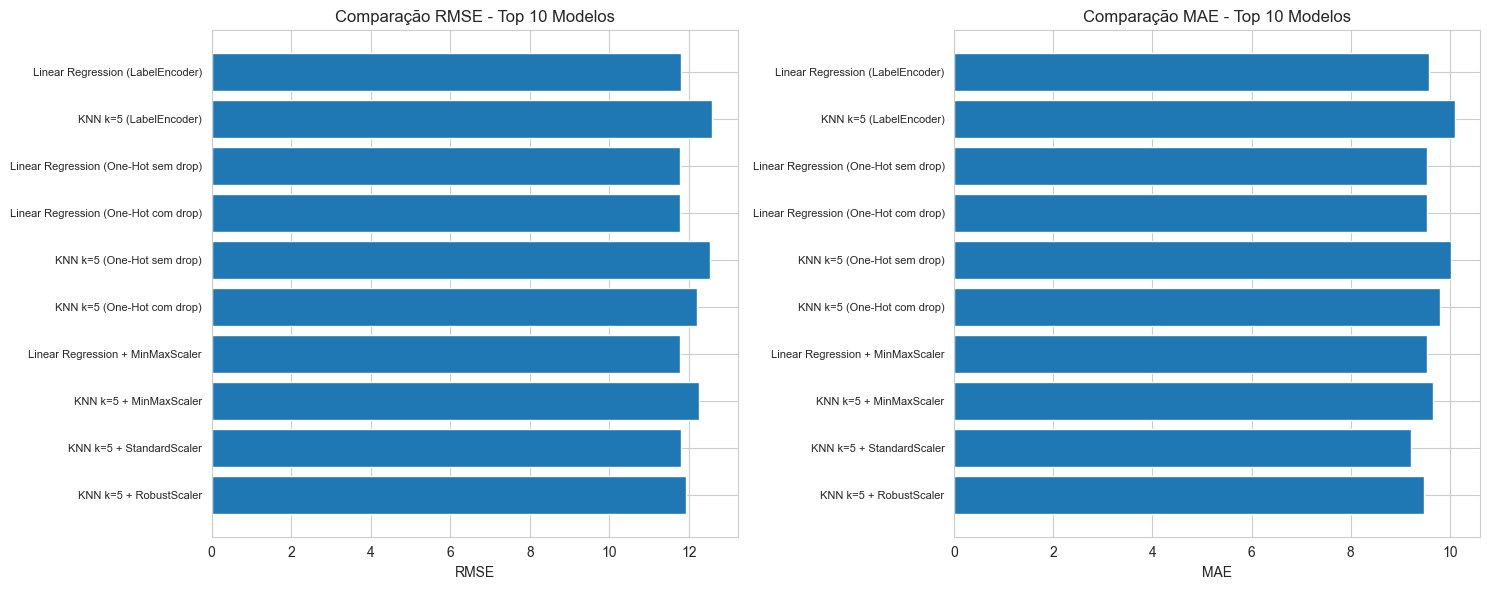

In [47]:
# Visualiza√ß√£o dos resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico RMSE
df_plot = df_resultados.head(10)  # Top 10 para legibilidade
ax1.barh(range(len(df_plot)), df_plot['RMSE'])
ax1.set_yticks(range(len(df_plot)))
ax1.set_yticklabels([exp.split(' - ')[1] if ' - ' in exp else exp for exp in df_plot['Experimento']], fontsize=8)
ax1.set_xlabel('RMSE')
ax1.set_title('Compara√ß√£o RMSE - Top 10 Modelos')
ax1.invert_yaxis()

# Gr√°fico MAE
ax2.barh(range(len(df_plot)), df_plot['MAE'])
ax2.set_yticks(range(len(df_plot)))
ax2.set_yticklabels([exp.split(' - ')[1] if ' - ' in exp else exp for exp in df_plot['Experimento']], fontsize=8)
ax2.set_xlabel('MAE')
ax2.set_title('Compara√ß√£o MAE - Top 10 Modelos')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()